In [2]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [7]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw= pd.read_csv("/home/pirl/test/BigData/체질검사.csv", encoding='euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [8]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data X size : {}".format(df_test_y .shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data X size : (76,)


### step 2 모델생성
- 기본 옵션으로 모델 생성

In [10]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.981
Score on test set: 0.584


### 모델 Parameter 조정
- n_estimators: 트리 수 변경에 따른 모델 성능

In [11]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimators: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)] #참조: para_n_tree: [10,20,30,...,100]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["Estimators"] = para_n_tree
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score


In [12]:
# 모델 설명력 확인
df_score_leaf.round(3)

,Estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.589
6,70,0.963,0.590
7,80,0.970,0.584
8,90,0.976,0.585
9,100,0.981,0.584


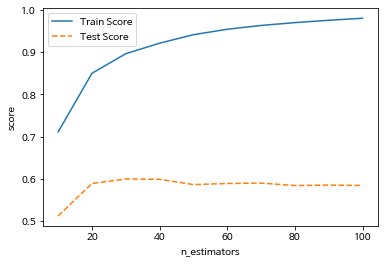

In [13]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

# min_samples_leaf: 잎사귀 노드의 최소 자료 수변경에 따른 모델 성능

In [14]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)] #참조: para_leaf: [1,2,3,...,20]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30,
                               min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score


In [15]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.897,0.600
1,2,0.899,0.596
2,3,0.896,0.595
3,4,0.893,0.586
4,5,0.890,0.604
5,6,0.888,0.596
6,7,0.884,0.590
7,8,0.874,0.610
8,9,0.879,0.598
9,10,0.873,0.587


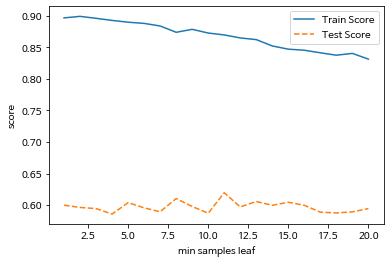

In [16]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

# min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [19]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(1,21)] #참조: para_leaf: [4,6,8,...,40]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30, min_samples_leaf = 11,
                               min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [20]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.870,0.620
1,4,0.870,0.620
2,6,0.870,0.620
3,8,0.870,0.620
4,10,0.870,0.620
5,12,0.870,0.620
6,14,0.870,0.620
7,16,0.870,0.620
8,18,0.870,0.620
9,20,0.870,0.620


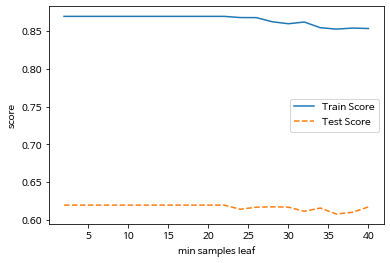

In [21]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

# max_depth: 최대 깊이 변경에 따른 모델 성능

In [23]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [n_depth for n_depth in range(1,11)] # 참조: para+depth:[1,2,3, ...,10]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30, 
                               min_samples_leaf = 11, min_samples_split = 22,
                               max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [24]:
# 모델 설명력 확인
df_score_split.round(3)

,Depth,TrainScore,TestScore
0,1,0.703,0.592
1,2,0.800,0.600
2,3,0.870,0.620
3,4,0.900,0.629
4,5,0.913,0.613
5,6,0.917,0.614
6,7,0.920,0.613
7,8,0.920,0.615
8,9,0.921,0.609
9,10,0.922,0.616


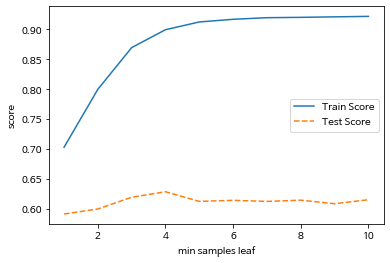

In [25]:
# 모델 설명력 그래프 확인: 4개
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

# learning_rate: 학습률 변경에 따른 모델 성능

In [26]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# learning rate: 학습률 변경 -.1 ~0.9
para_lr = [lr * 0.1 for lr in range(1,11)] # 참조: para+depth:[0.1,0.2,0.3, ...,0.9]


for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30, 
                               min_samples_leaf = 11, min_samples_split = 22,
                               max_depth = 4, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
      
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["LearningRate"] = para_lr
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [27]:
# 모델 설명력 확인
df_score_split.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.900,0.629
1,0.2,0.940,0.588
2,0.3,0.966,0.566
3,0.4,0.981,0.539
4,0.5,0.984,0.533
5,0.6,0.990,0.527
6,0.7,0.993,0.478
7,0.8,0.994,0.437
8,0.9,0.997,0.464
9,1.0,0.995,0.382


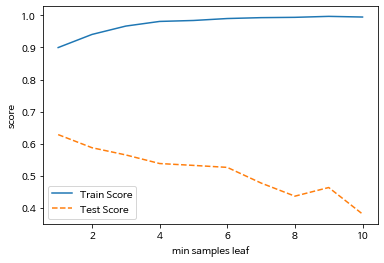

In [28]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

# 결론 도출
- 최종 모델 생성

In [31]:
gb_final = GradientBoostingRegressor(random_state = 1234, n_estimators = 30, min_samples_leaf = 11, 
                                     min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))  

Score on training set: 0.900
Score on test set: 0.629


# feature_importances_: 설명변수 중요도

In [35]:
# 변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 데이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# feature_importances의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.775
2,HEIGHT,0.038
12,WRIST,0.025
3,NECK,0.023
6,HIP,0.021
4,CHEST,0.021
0,AGE,0.021
7,THIGH,0.020
8,KNEE,0.017
10,BICEPS,0.014


Text(0, 0.5, '변수')

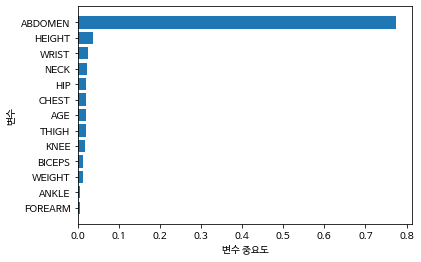

In [36]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# GridSearchCV를 이용한 최적 parameter 찾기

In [38]:
estimator = GradientBoostingRegressor(random_state = 1234)
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],"learning_rate": para_lr,
                            "max_depth": para_depth, "min_samples_leaf": para_leaf}

# 설명력이 높은 최적 parameter 찾기
grid_gb = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best estimator model: 
GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.2, loss='ls', max_depth=1,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

best parameter: 
{'criterion': 'mae', 'learning_rate': 0.2, 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 6}

best score: 
0.708
